In [133]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(34)

# PG

In [93]:
def PG(Q,p,x0,Ntry=1000):
    n=np.shape(Q)[0]
    normQ = np.sqrt(np.sum(Q**2))
    Theta1 = np.eye(n) - Q/normQ
    theta2 = p/normQ
    x = np.copy(x0)
    x[x<0]=0.0
    for i in range(0,Ntry):
        x = np.dot(Theta1,x) + theta2
        x[x<0] = 0.0
    return x

In [128]:
def PGlog(Q,p,x0,A,b,Ntry=1000):
    n=np.shape(Q)[0]
    normQ = np.sqrt(np.sum(Q**2))
    Theta1 = np.eye(n) - Q/normQ
    theta2 = p/normQ
    x = np.copy(x0)
    x[x<0]=0.0
    res=[]
    for i in range(0,Ntry):
        x = np.dot(Theta1,x) + theta2
        x[x<0] = 0.0
        res.append(np.sum((np.dot(A,x) - b)**2))
    return x,np.array(res)

In [136]:
Nj=100
Nk=50
A=np.random.rand(Nk*Nj).reshape(Nk,Nj)
xini=np.random.rand(Nj)
b=np.dot(A,xini)
p=np.dot(A.T,b)
Q=np.dot(A.T,A)
x0=np.random.rand(Nj)

In [137]:
x1=PG(Q,p,x0,1000)

## Note: x1 does not converge to xini

In [138]:
np.sum((np.dot(A,x1) - b)**2)

0.16979316896516522

In [141]:
x1log,resPG=PGlog(Q,p,x0,A,b,1000)

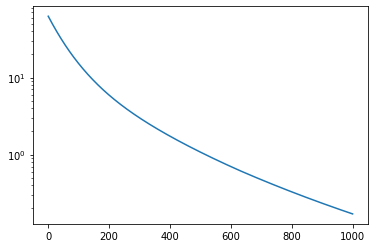

In [142]:
plt.figure()
plt.plot(resPG)
plt.yscale("log")

# APG 

In [156]:
def APG(Q,p,x0,Ntry=1000):
    n=np.shape(Q)[0]
    normQ = np.sqrt(np.sum(Q**2))
    Theta1 = np.eye(n) - Q/normQ
    theta2 = p/normQ
    x = np.copy(x0)
    y = np.copy(x0)
    x[x<0]=0.0
    alpha=1
    for i in range(0,Ntry):
        xp=np.copy(x)
        x = np.dot(Theta1,y) + theta2
        x[x<0] = 0.0
        dx=x-xp
        aa=alpha*alpha
        beta=alpha*(1.0-alpha)
        alpha=0.5*(np.sqrt(aa*aa + 4*aa) - aa)
        beta=beta/(alpha + aa)
        y=x+beta*dx
    return x

In [157]:
x2=APG(Q,p,x0,1000)

In [158]:
np.sum((np.dot(A,x2)-b)**2)

2.3806495227718512e-05

In [159]:
def APGlog(Q,p,x0,A,b,Ntry=1000):
    n=np.shape(Q)[0]
    normQ = np.sqrt(np.sum(Q**2))
    Theta1 = np.eye(n) - Q/normQ
    theta2 = p/normQ
    x = np.copy(x0)
    y = np.copy(x0)
    x[x<0]=0.0
    alpha=1
    res=[]
    for i in range(0,Ntry):
        xp=np.copy(x)
        x = np.dot(Theta1,y) + theta2
        x[x<0] = 0.0
        dx=x-xp
        aa=alpha*alpha
        beta=alpha*(1.0-alpha)
        alpha=0.5*(np.sqrt(aa*aa + 4*aa) - aa)
        beta=beta/(alpha + aa)
        y=x+beta*dx
        res.append(np.sum((np.dot(A,x) - b)**2))
    return x,np.array(res)

In [161]:
x2log,resAPG=APGlog(Q,p,x0,A,b,1000)

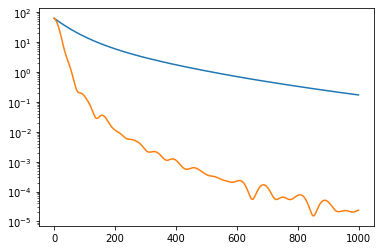

In [162]:
plt.figure()
plt.plot(resPG)
plt.plot(resAPG)
plt.yscale("log")

# APG+restart

In [174]:
def APGr(Q,p,x0,Ntry=1000):
    n=np.shape(Q)[0]
    normQ = np.sqrt(np.sum(Q**2))
    Theta1 = np.eye(n) - Q/normQ
    theta2 = p/normQ
    x = np.copy(x0)
    y = np.copy(x0)
    x[x<0]=0.0
    alpha=1
    costp=0.5*np.dot(x0,np.dot(Q,x0)) - np.dot(p,x0)
    for i in range(0,Ntry):
        xp=np.copy(x)
        x = np.dot(Theta1,y) + theta2
        x[x<0] = 0.0
        dx=x-xp
        aa=alpha*alpha
        beta=alpha*(1.0-alpha)
        alpha=0.5*(np.sqrt(aa*aa + 4*aa) - aa)
        beta=beta/(alpha + aa)
        y=x+beta*dx
        cost=0.5*np.dot(x,np.dot(Q,x)) - np.dot(p,x)
        if cost > costp:
            x = np.dot(Theta1,xp) + theta2
            y = np.copy(x)
        costp=np.copy(cost)
    return x

In [166]:
x3=APGr(Q,p,x0,1000)

In [171]:
def APGrlog(Q,p,x0,A,b,Ntry=1000):
    n=np.shape(Q)[0]
    normQ = np.sqrt(np.sum(Q**2))
    Theta1 = np.eye(n) - Q/normQ
    theta2 = p/normQ
    x = np.copy(x0)
    y = np.copy(x0)
    x[x<0]=0.0
    alpha=1
    costp=0.5*np.dot(x0,np.dot(Q,x0)) - np.dot(p,x0)
    res=[]
    for i in range(0,Ntry):
        xp=np.copy(x)
        x = np.dot(Theta1,y) + theta2
        x[x<0] = 0.0
        dx=x-xp
        aa=alpha*alpha
        beta=alpha*(1.0-alpha)
        alpha=0.5*(np.sqrt(aa*aa + 4*aa) - aa)
        beta=beta/(alpha + aa)
        y=x+beta*dx
        cost=0.5*np.dot(x,np.dot(Q,x)) - np.dot(p,x)
        if cost > costp:
            x = np.dot(Theta1,xp) + theta2
            y = np.copy(x)
        costp=np.copy(cost)
        res.append(np.sum((np.dot(A,x) - b)**2))
    return x,np.array(res)

In [172]:
x3log,resAPGr=APGrlog(Q,p,x0,A,b,1000)

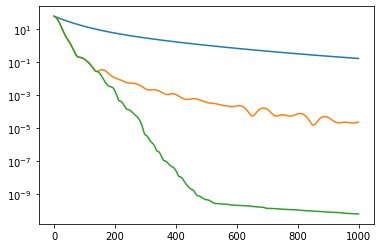

In [173]:
plt.figure()
plt.plot(resPG)
plt.plot(resAPG)
plt.plot(resAPGr)
plt.yscale("log")